In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
pd.set_option('display.max_columns', 200)

# Loading the Dataset

In [2]:
#Load the training dataset
data = pd.read_csv("KDDTrain+.txt")
data_2, meta = arff.loadarff('KDDTrain+.arff')
data_2 = pd.DataFrame(data_2)


# Load the Test Dataset
df = pd.read_csv("KDDTest+.txt")
df_2, meta = arff.loadarff('KDDTest+.arff')
df_2 = pd.DataFrame(df_2)

In [3]:
data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
df

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [5]:
data_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'normal'
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,b'normal'
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [6]:
df_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,b'tcp',b'smtp',b'SF',794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',b'http',b'SF',317.0,938.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,11.0,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',b'http',b'SF',54540.0,8314.0,b'0',0.0,0.0,2.0,0.0,b'1',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',5.0,10.0,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'
22542,0.0,b'udp',b'domain_u',b'SF',42.0,42.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',4.0,6.0,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255.0,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,b'normal'


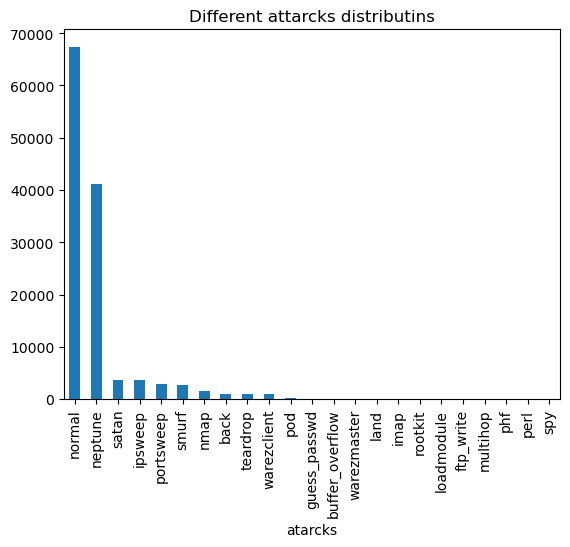

In [7]:
data['normal'].value_counts().plot(kind = 'bar', title = 'Different attarcks distributins', xlabel= 'atarcks');

In [8]:
data['normal'].value_counts()

normal
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

The attack types are grouped based on their characteristics and objectives. Here's why each attack belongs to its chosen group:

#### DOS (Denial of Service)
These attacks aim to disrupt the availability of a service by overwhelming the target with excessive requests or exploiting vulnerabilities to crash the system.
- Examples: neptune, smurf, apache2, mailbomb, processtable, pod, back, teardrop, land, udpstorm.

#### PROBE
These attacks aim to gather information about a network or system to identify vulnerabilities that can be exploited later.
- Examples: satan, ipsweep, nmap, portsweep, mscan, saint.

#### U2R (User to Root)
These attacks occur when an attacker gains unauthorized root access from a user-level account, typically exploiting system vulnerabilities.
- Examples: buffer_overflow, loadmodule, perl, rootkit, xterm, sqlattack.

#### R2L (Remote to Local)
These attacks involve an attacker gaining unauthorized access to a local machine from a remote location, usually through exploiting vulnerabilities in network services.
- Examples: guess_passwd, ftp_write, imap, multihop, named, phf, sendmail, snmpgetattack, snmpguess, warezmaster, worm, xlock, xsnoop, httptunnel, ps.


In [9]:
### Define attack groups
dos_attacks = ['neptune', 'smurf', 'back', 'teardrop', 'pod', 'land']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep']
u2r_attacks = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
r2l_attacks = ['guess_passwd', 'ftp_write', 'imap', 'multihop', 'phf', 'warezclient', 'warezmaster', 'spy']

# Function to classify attack types
def classify_attack(attack):
    if attack == 'normal':
        return 'normal'
    elif attack in dos_attacks:
        return 'DOS'
    elif attack in probe_attacks:
        return 'PROBE'
    elif attack in u2r_attacks:
        return 'U2R'
    elif attack in r2l_attacks:
        return 'R2L'
    else:
        return 'Unknown'

# Apply classification to Training set
data['attack_group'] = data['normal'].apply(classify_attack)
# Drop the original class clomuns and the extra column
data.drop(['normal', '20'], axis = 1, inplace = True)

# Apply classification to Test set
df['attack_group'] = df['neptune'].apply(classify_attack)
# Drop the original class clomuns and the extra column
df.drop(['neptune', '21'], axis = 1, inplace = True)

In [10]:
data.attack_group.value_counts()

attack_group
normal    67342
DOS       45927
PROBE     11656
R2L         995
U2R          52
Name: count, dtype: int64

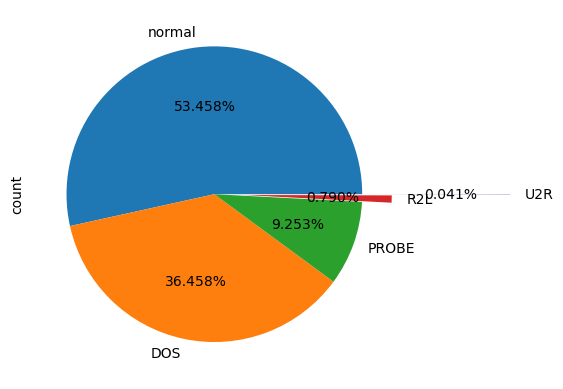

In [11]:
data['attack_group'].value_counts().plot(kind ="pie", autopct = "%1.3f%%", explode = [0,0,0,0.2,1]);

In [12]:
data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,attack_group
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS


In [13]:
data.columns = data_2.columns
df.columns = df_2.columns

In [14]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS


In [15]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,DOS
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Unknown
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Unknown
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,DOS
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


## One-Hot Encode Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Using LabelEncoder
label_encoder = LabelEncoder()
data['protocol_encoded'] = label_encoder.fit_transform(data['protocol_type'])
data['service_encoded'] = label_encoder.fit_transform(data['service'])
data['flag_encoded'] = label_encoder.fit_transform(data['flag'])

onehot_encoder = OneHotEncoder(sparse_output=False)
protocol_encoded = onehot_encoder.fit_transform(data[['protocol_type']])
protocol_df = pd.DataFrame(protocol_encoded, columns=[f'protocol_{col}' for col in onehot_encoder.categories_[0]])

service_encoded = onehot_encoder.fit_transform(data[['service']])
service_df = pd.DataFrame(service_encoded, columns=[f'service_{col}' for col in onehot_encoder.categories_[0]])

flag_encoded = onehot_encoder.fit_transform(data[['flag']])
flag_df = pd.DataFrame(flag_encoded, columns=[f'flag_{col}' for col in onehot_encoder.categories_[0]])

# join the encoded features with the original dataframe & Drop original categorical columns
data = pd.concat([data, protocol_df, service_df, flag_df], axis=1)
data.drop(['protocol_type', 'service', 'flag'], axis=1, inplace=True)
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_encoded,service_encoded,flag_encoded,protocol_icmp,protocol_tcp,protocol_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,2,44,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,1,49,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,1,49,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [17]:
# Split Data into Features and Target variables
X = data.drop('class', axis =1)
y = data['class']

print(y)
X

0         normal
1            DOS
2         normal
3         normal
4            DOS
           ...  
125967       DOS
125968    normal
125969    normal
125970       DOS
125971    normal
Name: class, Length: 125972, dtype: object


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_encoded,service_encoded,flag_encoded,protocol_icmp,protocol_tcp,protocol_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,2,44,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,49,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,49,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
#RUC 
from sklearn.metrics import roc_auc_score, roc_curve
def plot_auroc(model, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUROC
    auroc = roc_auc_score(y_test, y_probs)
    print(f"AUROC: {auroc:.4f}")
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUROC = {auroc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

## Balancing the Dataset

In [19]:
#import imblearn to balance the classes
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
from collections import Counter

counter = Counter(y)
print("##---THE UNSAMPLED DATASET----##\n\n")
print(counter)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
counter = Counter(y)
print("\n\n##---THE UNSAMPLED DATASET----##\n\n")
print(counter)

##---THE UNSAMPLED DATASET----##


Counter({'normal': 67342, 'DOS': 45927, 'PROBE': 11656, 'R2L': 995, 'U2R': 52})


##---THE UNSAMPLED DATASET----##


Counter({'normal': 67342, 'DOS': 67342, 'R2L': 67342, 'PROBE': 67342, 'U2R': 67342})


In [20]:
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_encoded,service_encoded,flag_encoded,protocol_icmp,protocol_tcp,protocol_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.000000,0.0,0.0,0.0,0.080000,0.150000,0.00,255,1,0.000000,0.600000,0.880000,0.000000,0.00,0.00,0.0,0.00,2,44,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.000000,1.0,0.0,0.0,0.050000,0.070000,0.00,255,26,0.100000,0.050000,0.000000,0.000000,1.00,1.00,0.0,0.00,1,49,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.200000,0.2,0.0,0.0,1.000000,0.000000,0.00,30,255,1.000000,0.000000,0.030000,0.040000,0.03,0.01,0.0,0.01,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.09,255,255,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.00,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.000000,0.0,1.0,1.0,0.160000,0.060000,0.00,255,19,0.070000,0.070000,0.000000,0.000000,0.00,0.00,1.0,1.00,1,49,1,0.0,1.0,0.0,0.0,0.0

In [21]:
final_df = pd.concat([X,y], axis =1)
final_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_encoded,service_encoded,flag_encoded,protocol_icmp,protocol_tcp,protocol_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.000000,0.0,0.0,0.0,0.080000,0.150000,0.00,255,1,0.000000,0.600000,0.880000,0.000000,0.00,0.00,0.0,0.00,2,44,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.000000,1.0,0.0,0.0,0.050000,0.070000,0.00,255,26,0.100000,0.050000,0.000000,0.000000,1.00,1.00,0.0,0.00,1,49,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DOS
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.200000,0.2,0.0,0.0,1.000000,0.000000,0.00,30,255,1.000000,0.000000,0.030000,0.040000,0.03,0.01,0.0,0.01,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.09,255,255,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.00,1,24,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.000000,0.0,1.0,1.0,0.160000,0.060000,0.00,255,19,0.070000,0.070000,0.000000,0.000000,0.00,0.00,1.0,

## suffle and selct a subset for fast train

<Axes: ylabel='count'>

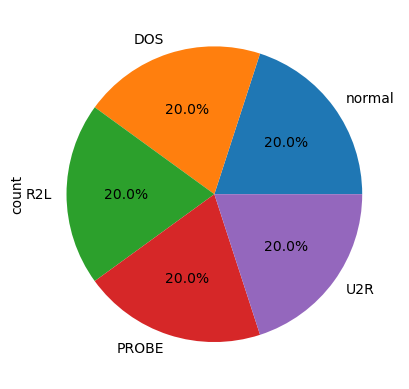

In [22]:
final_df['class'].value_counts().plot(kind ="pie", autopct = "%1.1f%%")

<Axes: ylabel='count'>

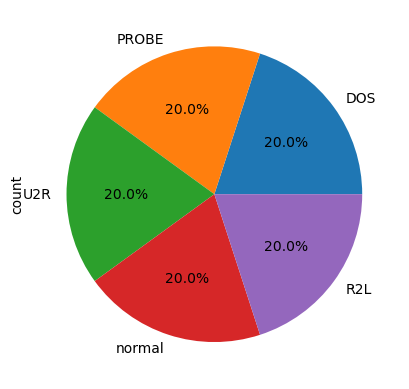

In [23]:
# shuffle the DataFrame rows
final_df = final_df.sample(frac = 1)
# final_df = final_df.iloc[:100000,:]
final_df['class'].value_counts().plot(kind ="pie", autopct = "%1.1f%%")

In [24]:
final_df.shape

(336710, 126)

In [25]:
y = final_df['class']

#### Label Encode the target variable

In [26]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'DOS': 0, 'PROBE': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}


In [27]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(final_df.iloc[:,:-1], encoded_y, test_size=0.25,
                                                  random_state=0,
                                                  stratify=encoded_y)


print('y Training set', y_train, sep='\n')
print('y Validation set', y_val, sep='\n')
X_train

y Training set
[2 4 3 ... 2 2 2]
y Validation set
[4 0 3 ... 1 1 1]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_encoded,service_encoded,flag_encoded,protocol_icmp,protocol_tcp,protocol_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
225175,1,1196,2449,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.000000,0.000000,0.00,255,123,0.483681,0.020000,0.000000,0.000000,0.0,0.0,0.010000,0.0,1,19,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10282,0,43,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,154,0.0,0.0,0.0,0.0,0.990000,0.010000,0.00,255,254,1.000000,0.010000,0.010000,0.000000,0.0,0.0,0.000000,0.0,2,12,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
316078,0,0,5803,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.753648,0.492704,0.00,1,1,1.000000,0.000000,1.000000,0.330112,0.0,0.0,0.000000,0.0,1,20,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21785,0,44,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182,262,0.0,0.0,0.0,0.0,1.000000,0.000000,0.01,255,253,0.990000,0.010000,0.000000,0.000000,0.0,0.0,0.000000,0.0,2,12,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,256,5,1.0,1.0,0.0,0.0,0.020000,0.064288,0.00,255,2,0.008576,0.070000,0.000000,0.000000,1.0,1.0,0.000000,0

# PCA

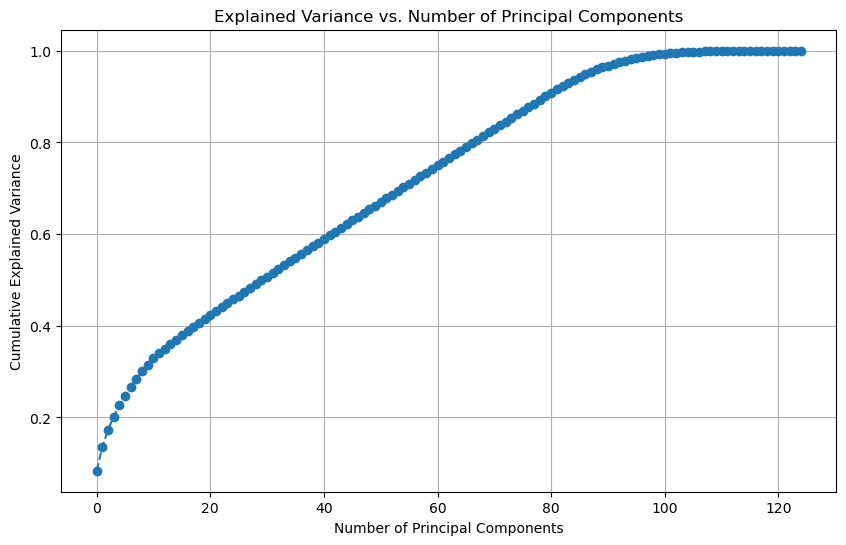

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df.iloc[:,:-1])

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Determine explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain at least 95% of the variance
num_components = next(i for i, cumulative_variance in enumerate(explained_variance) if cumulative_variance >= 0.95) + 1

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])


In [29]:
pc_df['class'] = final_df['class']
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,class
0,4.929765,3.543582,-0.452254,0.154670,-1.233817,-1.034680,1.721448,-3.249223,1.966090,3.246815,4.031629,1.501810,0.690768,-0.587426,0.702173,-1.551561,0.925535,-4.599382,0.623638,-0.798517,1.585979,0.150708,2.683907,-2.172196,0.427162,2.754202,-3.228797,-0.705734,-1.036145,-0.982591,2.595094,0.750302,2.845673,-4.946672,1.222624,-0.473899,-0.682381,0.427215,-1.518595,0.657288,2.392965,-0.789453,2.115595,-3.645037,0.616726,-3.960514,0.318926,0.187540,-0.622964,0.089952,1.224375,-3.287442,3.003622,-2.949959,-2.372764,9.255214,11.136093,4.814468,-1.010356,-0.786241,-7.610577,-1.437864,0.022798,3.096121,0.767758,-0.484244,-0.064816,-0.045269,0.156721,-1.865504,-0.502641,0.292994,0.088368,-0.543142,0.449136,0.072317,-0.205524,-0.102439,0.853212,-0.661076,0.397412,1.958175,-0.733170,0.111484,1.594548,0.295501,-0.031063,1.532229,normal
1,2.728892,2.608462,0.158892,0.469210,0.010083,0.265677,-0.658654,1.035136,2.210289,-0.477213,-1.554741,-1.647006,-0.474639,0.997857,-0.024719,2.716990,1.435146,-1.017323,-0.153693,-2.083981,2.665679,0.379795,5.326956,1.746384,-2.269807,-3.673386,1.565857,1.121299,5.900815,-2.180301,-2.003704,-7.891689,9.185041,3.358681,-0.312050,0.959713,-3.752451,-1.278484,9.512388,-0.872607,-0.062474,-0.757202,0.351616,-1.661205,-1.449115,1.490759,-0.790258,0.100983,0.273957,0.117664,-0.660974,1.138736,0.336282,-0.146475,0.477350,0.408416,-1.129866,2.611328,-1.648900,1.928968,-1.010546,-1.953074,2.151353,2.409626,1.493026,0.160543,1.918423,-1.582832,0.338452,-2.971294,3.325317,-1.098328,2.112881,0.498868,0.831844,7.744243,2.017586,-0.916891,-4.303300,3.057503,5.158497,1.808706,-1.387064,-0.525825,-0.779928,0.075723,-0.123223,-0.382499,DOS
2,-3.884812,0.310923,-6.462480,0.612567,-1.820671,0.957027,-0.437529,-0.316970,0.423901,-1.414156,0.399605,0.404179,-0.040076,0.018389,0.006315,-0.010648,-0.225263,0.115144,0.069459,-0.026408,0.100070,0.026988,0.026953,-0.072361,-0.117427,-0.054298,-0.015540,0.058637,0.022996,0.000206,0.150299,0.047145,-0.019675,0.032432,0.098302,0.002866,0.041113,0.012706,0.040242,0.034236,0.004633,0.080586,0.054909,0.018948,0.016078,0.001148,-0.009791,-0.006635,0.004615,0.001911,-0.004172,-0.020407,0.013991,0.012310,-0.005178,0.000413,0.024782,-0.003580,0.026101,-0.007195,0.002275,-0.008836,-0.001657,0.009684,-0.000349,0.007231,0.009656,-0.011143,-0.006272,0.009327,0.005281,0.002343,0.003031,-0.013319,0.002122,-0.004587,-0.009183,-0.003063,0.011940,0.003038,-0.054936,0.005008,0.000728,-0.035456,-0.050463,0.018976,-0.006055,-0.224933,normal
3,0.471931,0.998229,-0.115458,-0.138748,-0.301500,-0.044425,-0.344260,1.112521,0.085697,-0.188278,0.489468,0.967958,-0.213779,-0.574875,0.544331,-2.049672,7.655373,3.185010,0.170083,-0.451117,-0.061093,-0.219294,0.141476,-0.052133,0.028089,0.241586,0.061974,0.093386,-0.044484,-0.046605,-0.210702,-0.300530,0.107199,-0.190186,-0.066772,-0.020195,-0.082130,-0.004286,0.048584,-0.087848,-0.069688,0.043201,-0.186487,-0.026139,-0.035114,0.011032,0.061916,-0.015849,0.007328,0.003155,0.016064,-0.026736,-0.002346,0.027951,-0.074092,-0.241895,0.056468,0.033121,-0.006878,-0.094805,-0.060635,0.053087,0.003873,-0.131807,-0.105069,0.028137,0.059093,-0.060160,-0.021040,-0.032777,-0.054281,-0.062706,-0.038918,0.053947,0.002570,0.049949,0.074797,0.012723,-0.096307,-0.002968,0.569029,-1.896928,0.677740,-7.374916,2.785737,-0.914372,-0.235788,0.789816,normal
4,-2.783375,0.050164,-4.137729,-0.642600,-0.503263,1.040980,-0.269934,-1.343549,-1.383538,4.544187,-2.586185,-1.910609,0.277406,-0.082450,-0.024295,0.376898,0.966781,-0.675884,-0.326195,0.227987,-0

In [34]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(pc_df.iloc[:,:-1], encoded_y, test_size=0.25,
                                                  random_state=0,
                                                  stratify=encoded_y)


print('y Training set', y_train, sep='\n')
print('y Validation set', y_val, sep='\n')

y Training set
[2 4 3 ... 2 2 2]
y Validation set
[4 0 3 ... 1 1 1]


In [40]:
X_val

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88
13967,-2.663208,-0.153220,0.066454,-0.444397,-0.066858,-1.982063,2.233984,-0.902716,0.430863,-1.824212,-0.797221,0.086129,-0.238830,0.031167,0.061060,-0.166244,0.095668,-0.156108,0.391690,0.477975,0.086936,0.013110,0.051755,-0.094925,-0.136204,-0.066148,0.056177,0.172810,-0.027203,0.152421,0.163250,0.041832,0.010527,0.050100,0.110585,-0.035500,0.014270,0.036118,0.051037,0.078353,-0.059327,0.226261,-0.058784,0.013278,0.022648,-0.032232,-0.003511,-0.001337,0.009593,0.003103,-0.017124,-0.053336,0.031856,0.022749,-0.041806,-0.106252,0.112429,0.015007,0.054346,-0.041663,0.025969,-0.012424,0.006979,-0.017999,-0.029336,0.018574,0.029673,-0.022032,-0.000298,0.042784,-0.045297,-0.012622,-0.028844,0.031851,0.010768,-0.025676,0.002839,0.010824,-0.022105,-0.002827,0.108031,-0.087803,-0.118312,0.131807,-0.148721,0.025555,0.053027,-0.285751
200317,-1.984935,-0.152592,1.114286,-0.270553,0.043352,-1.546411,1.605778,-0.477682,0.097274,-0.795208,-0.632287,-0.018948,-0.126193,0.034376,0.009125,0.002038,0.213866,-0.252738,0.301950,0.784818,0.001210,-0.007250,-0.021700,-0.010902,-0.089825,0.012882,0.064159,0.128361,-0.053081,0.129370,0.107477,-0.001578,0.049988,0.052330,0.079304,-0.024284,0.007456,0.023463,0.072054,0.053448,-0.051017,0.170261,-0.115461,-0.012356,0.024253,-0.015061,-0.003061,-0.006667,0.013663,0.002155,-0.019670,-0.032528,0.025102,0.005760,-0.030038,-0.094951,0.084099,0.006345,0.046759,-0.057220,-0.010438,0.011534,-0.003881,-0.042408,-0.035083,-0.005087,0.025013,-0.034674,0.004344,0.036304,-0.062967,-0.024545,-0.040662,0.057136,0.022591,-0.013401,0.022718,0.017588,-0.055323,-0.007353,0.194867,-0.061023,-0.117988,0.061240,-0.097319,-0.014172,0.066623,0.254797
101820,-2.500466,0.349375,2.381092,3.591794,1.836890,2.652057,-1.934960,-2.310246,-1.437068,-0.098562,-2.311618,4.497988,-1.568428,0.368869,0.772439,0.001776,0.381793,-1.495477,0.950518,-1.105792,1.433837,0.330590,3.665220,-1.074503,2.228561,-1.632183,0.253978,-0.094147,-0.227079,1.304693,-1.242052,-0.393072,-1.470333,-0.251239,-1.885460,-0.859744,-0.814920,0.684480,-1.019368,0.276104,-0.309062,-0.073097,0.078242,0.097634,-0.071580,-0.265099,0.133512,-0.014654,-0.011278,0.007495,0.338683,-0.199273,-0.047286,0.134987,-0.020125,-0.492426,-0.063685,0.081831,-0.022672,0.080183,-0.010744,-0.085380,0.052260,-0.208350,0.005712,0.012750,-0.115664,0.176499,0.007457,0.247228,-0.085083,0.039169,0.004972,-0.005405,-0.069977,-0.321733,0.082181,0.008200,-0.174362,0.095479,0.462490,-0.869334,0.315257,0.324819,-0.763672,0.119083,0.253212,0.033538
21422,4.659362,-4.916467,-0.812708,0.241899,-0.516722,-0.437721,0.349971,0.248766,0.090870,0.540000,0.622077,1.428894,0.511007,-0.421532,0.470851,-1.769211,7.200349,3.392341,-0.016919,-0.140026,-0.023928,-0.201389,0.077052,-0.099508,0.022316,0.155892,0.051705,0.077201,-0.085090,-0.025053,-0.279050,-0.114675,0.017655,-0.266393,-0.171264,0.013386,-0.041777,-0.004208,-0.021807,0.059246,-0.101150,0.025077,-0.032920,-0.050295,-0.030765,-0.025313,0.025620,0.000698,0.003758,-0.000520,0.013804,-0.026516,-0.018004,0.022215,-0.019288,-0.054058,0.064257,-0.000202,0.035229,-0.047630,0.010658,-0.000544,-0.013182,-0.029803,-0.052270,0.052085,0.063177,-0.064456,-0.041527,-0.019945,-0.060493,-0.035101,-0.031191,0.000794,0.000170,-0.024043,0.047096,0.006667,-0.050724,-0.016377,0.287636,-1.917742,1.007986,-7.299126,1.438950,-0.620437,-0.067517,-0.249937
301096,-1.697463,-0.154821,1.274683,-0.132364,0.542137,-0.787459,0.972115,-0.904542,0.260974,-2.012365,-1.165818,-2.433313,1.240141,-1.010243,-0.271024,-1.633505,-0.080859,-0.618310,-0.797272,-4.

In [32]:
# X_val.to_csv("test_dataset.csv")

### Train Model

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result
def calculate_rates(y_true, y_pred):
    conf_matrix = multilabel_confusion_matrix(y_true, y_pred)
    
    # Initialize lists to store rates for each class
    TPR = []
    FPR = []
    FNR = []
    TNR = []

    # Calculate rates for each class
    for cm in conf_matrix:
        TP = cm[1, 1]
        FP = cm[0, 1]
        TN = cm[0, 0]
        FN = cm[1, 0]

        TPR.append(TP / (TP + FN))
        FPR.append(FP / (FP + TN))
        FNR.append(FN / (TP + FN))
        TNR.append(TN / (FP + TN))

    return {
        "TPR": TPR,
        "FPR": FPR,
        "FNR": FNR,
        "TNR": TNR
    }

def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    print(cm,label)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='')

# class labels
label = ['normal', 'DoS',  'PROBE', 'R2L', 'U2R']

### KNN Algorithm

{'accuracy_score': 0.9946660647675164, 'precision_score': 0.9946710474890974, 'recall_score': 0.9946661096411631, 'f1_score': 0.994661224375373}
[[16783    48     0     2     2]
 [   40 16771     1     4    20]
 [    0     0 16771    37    27]
 [    0     0     4 16810    22]
 [   28    52    75    87 16594]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16835
           1       0.99      1.00      1.00     16836
           2       1.00      1.00      1.00     16835
           3       0.99      1.00      1.00     16836
           4       1.00      0.99      0.99     16836

    accuracy                           0.99     84178
   macro avg       0.99      0.99      0.99     84178
weighted avg       0.99      0.99      0.99     84178



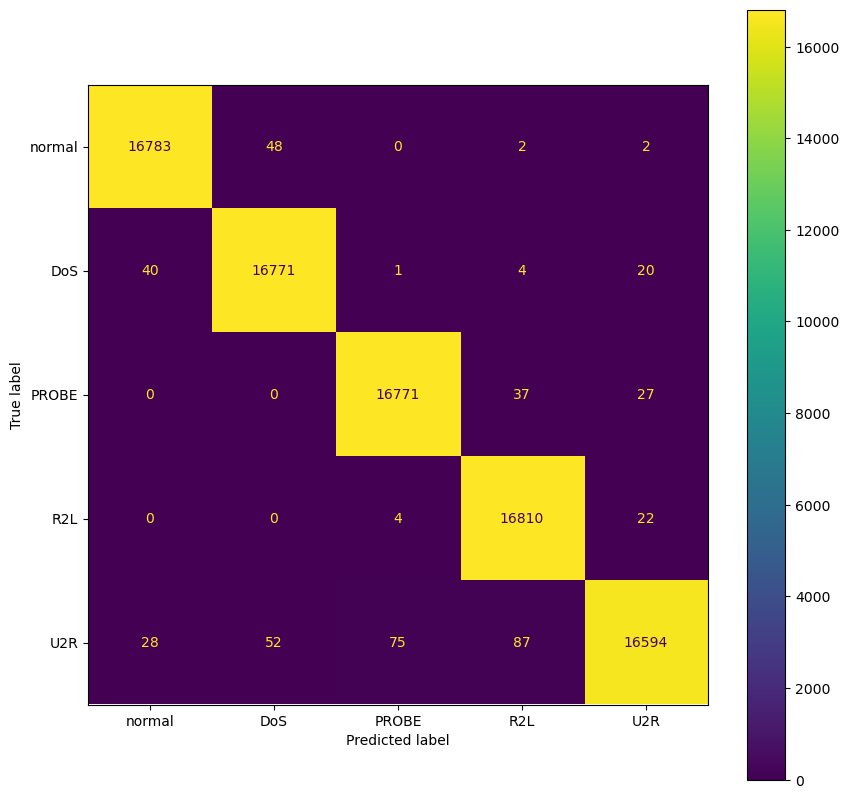

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_val)

print(evaluate_model(y_val, knn_y_pred))
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

AUROC: 0.9991


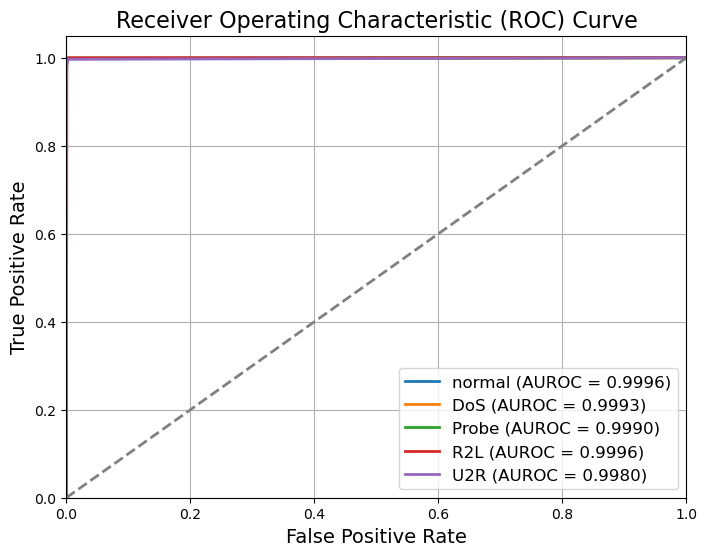

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_auroc(model, X_test, y_test):
    # Get the predicted probabilities for each class
    y_probs = model.predict_proba(X_test)
    
    # Define class names
    class_names = ['normal', 'DoS', 'Probe', 'R2L', 'U2R']
    
    # Calculate the AUROC for multi-class
    auroc = roc_auc_score(y_test, y_probs, multi_class='ovr')
    print(f"AUROC: {auroc:.4f}")
    
    # Calculate the ROC curve for each class
    fpr = {}
    tpr = {}
    thresholds = {}
    n_classes = len(class_names)

    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_probs[:, i], pos_label=i)
    
    # Plot the ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUROC = {roc_auc_score((y_test == i).astype(int), y_probs[:, i]):.4f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

# Example usage
plot_auroc(knn_model, X_val, y_val)


In [41]:
calculate_rates(y_val, knn_y_pred)

{'TPR': [0.9969111969111969,
  0.9961392254692326,
  0.9961983961983962,
  0.9984556901876931,
  0.9856260394392967],
 'FPR': [0.0010097560251251059,
  0.0014849573817231445,
  0.0011879482648530656,
  0.0019304445962400878,
  0.0010543197410234327],
 'FNR': [0.003088803088803089,
  0.003860774530767403,
  0.0038016038016038018,
  0.0015443098123069613,
  0.014373960560703255],
 'TNR': [0.9989902439748749,
  0.9985150426182768,
  0.998812051735147,
  0.99806955540376,
  0.9989456802589766]}

In [ ]:
### Saving the model results in a csv format

In [54]:
knn_ = pd.DataFrame({'actual':y_val, 'predicted_knn': knn_y_pred})

# Mapping of label encoded classes
label_mapping = {0: 'DOS', 1: 'PROBE', 2: 'R2L', 3: 'U2R', 4: 'normal'}

# Map the numeric labels back to their original class names
knn_['actual'], knn_['predicted_knn'] = knn_['actual'].map(label_mapping), knn_['predicted_knn'].map(label_mapping)

# knn_.to_csv("knn_result.csv", index=False)
knn_

,actual,predicted_knn
0,normal,normal
1,DOS,DOS
2,U2R,U2R
3,DOS,DOS
4,normal,normal
...,...,...
84173,PROBE,PROBE
84174,normal,normal
84175,PROBE,PROBE
84176,PROBE,PROBE


### Random Forest Classifier

{'accuracy_score': 0.9997980469956521, 'precision_score': 0.9997980426070674, 'recall_score': 0.9997980510881437, 'f1_score': 0.9997980323852097}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16835
           1       1.00      1.00      1.00     16836
           2       1.00      1.00      1.00     16835
           3       1.00      1.00      1.00     16836
           4       1.00      1.00      1.00     16836

    accuracy                           1.00     84178
   macro avg       1.00      1.00      1.00     84178
weighted avg       1.00      1.00      1.00     84178

[[16834     0     0     0     1]
 [    0 16832     0     0     4]
 [    0     0 16835     0     0]
 [    0     0     0 16836     0]
 [    4     2     2     4 16824]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']


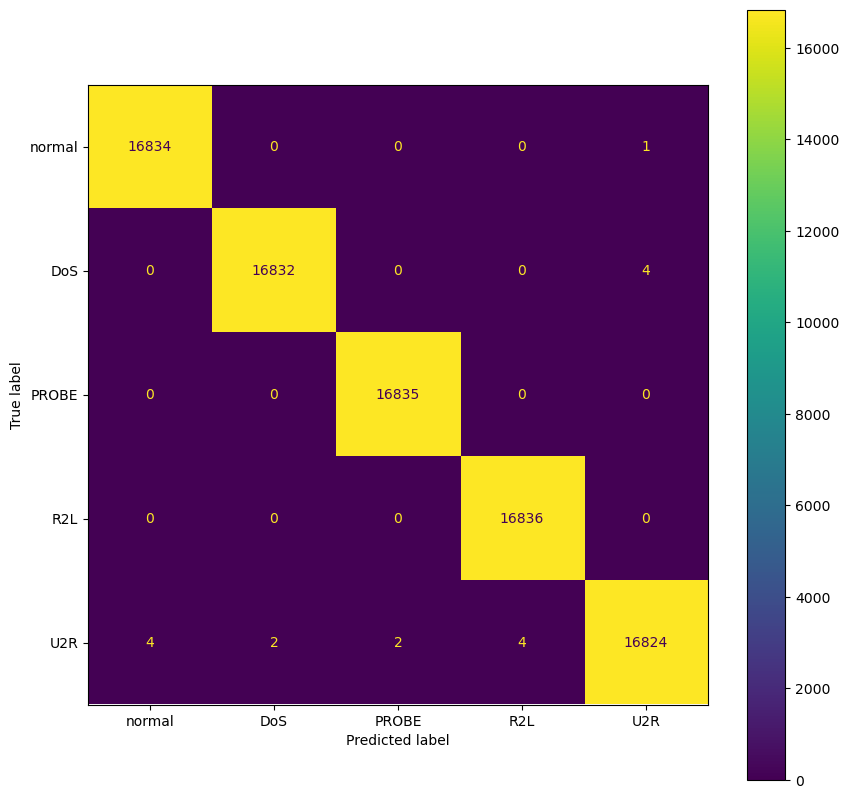

In [55]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500,
                                             criterion="entropy")
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

[[16834     0     0     0     1]
 [    0 16832     0     0     4]
 [    0     0 16835     0     0]
 [    0     0     0 16836     0]
 [    4     2     2     4 16824]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']


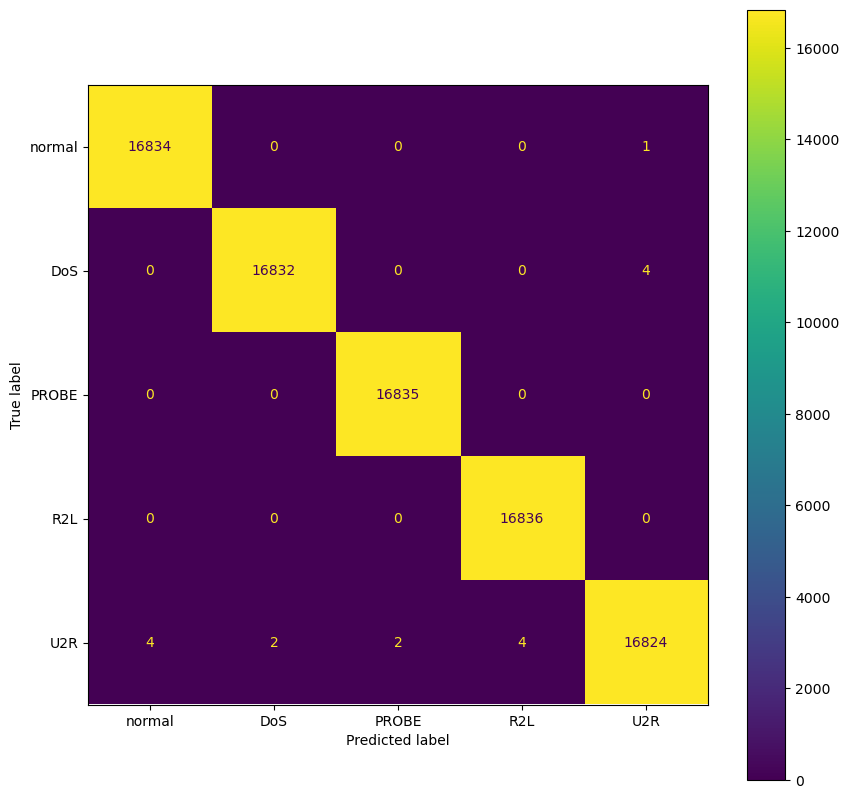

In [56]:
plot_confusion_matrix(y_val, random_forest_y_pred, label)

AUROC: 1.0000


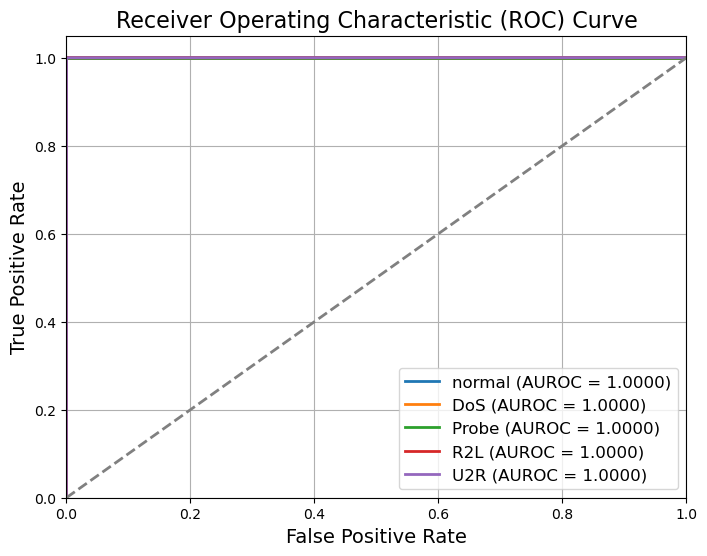

In [57]:
plot_auroc(random_forest_model, X_val, y_val) 

In [58]:
calculate_rates(y_val, random_forest_y_pred)

{'TPR': [0.9999405999405999, 0.9997624138750297, 1.0, 1.0, 0.9992872416250891],
 'FPR': [5.939741324265328e-05,
  2.969914763446289e-05,
  2.969870662132664e-05,
  5.939829526892578e-05,
  7.424786908615723e-05],
 'FNR': [5.94000594000594e-05,
  0.00023758612497030174,
  0.0,
  0.0,
  0.0007127583749109052],
 'TNR': [0.9999406025867573,
  0.9999703008523655,
  0.9999703012933787,
  0.9999406017047311,
  0.9999257521309138]}

In [59]:
calculate_rates(y_val, random_forest_y_pred)

{'TPR': [0.9999405999405999, 0.9997624138750297, 1.0, 1.0, 0.9992872416250891],
 'FPR': [5.939741324265328e-05,
  2.969914763446289e-05,
  2.969870662132664e-05,
  5.939829526892578e-05,
  7.424786908615723e-05],
 'FNR': [5.94000594000594e-05,
  0.00023758612497030174,
  0.0,
  0.0,
  0.0007127583749109052],
 'TNR': [0.9999406025867573,
  0.9999703008523655,
  0.9999703012933787,
  0.9999406017047311,
  0.9999257521309138]}

In [61]:
rfc_ = pd.DataFrame({'actual':y_val, 'predicted_rfc': random_forest_y_pred})



# Map the numeric labels back to their original class names
rfc_['actual'], rfc_['predicted_rfc'] = rfc_['actual'].map(label_mapping), rfc_['predicted_rfc'].map(label_mapping)

# rfc_.to_csv("RFC_result.csv", index=False)
rfc_

,actual,predicted_rfc
0,normal,normal
1,DOS,DOS
2,U2R,U2R
3,DOS,DOS
4,normal,normal
...,...,...
84173,PROBE,PROBE
84174,normal,normal
84175,PROBE,PROBE
84176,PROBE,PROBE


# WAIT--------------

### Naive Bayes

{'accuracy_score': 0.396564423008387, 'precision_score': 0.39947281464438883, 'recall_score': 0.39656658977400244, 'f1_score': 0.2674755885063367}
              precision    recall  f1-score   support

           0       0.51      0.96      0.67     16835
           1       0.41      0.07      0.12     16836
           2       0.39      0.01      0.02     16835
           3       0.32      0.91      0.47     16836
           4       0.37      0.03      0.05     16836

    accuracy                           0.40     84178
   macro avg       0.40      0.40      0.27     84178
weighted avg       0.40      0.40      0.27     84178

[[16207     0     0   280   348]
 [ 7786  1200   143  7635    72]
 [ 1029  1600   216 13976    14]
 [ 1187     0     0 15309   340]
 [ 5568   120   198 10500   450]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']


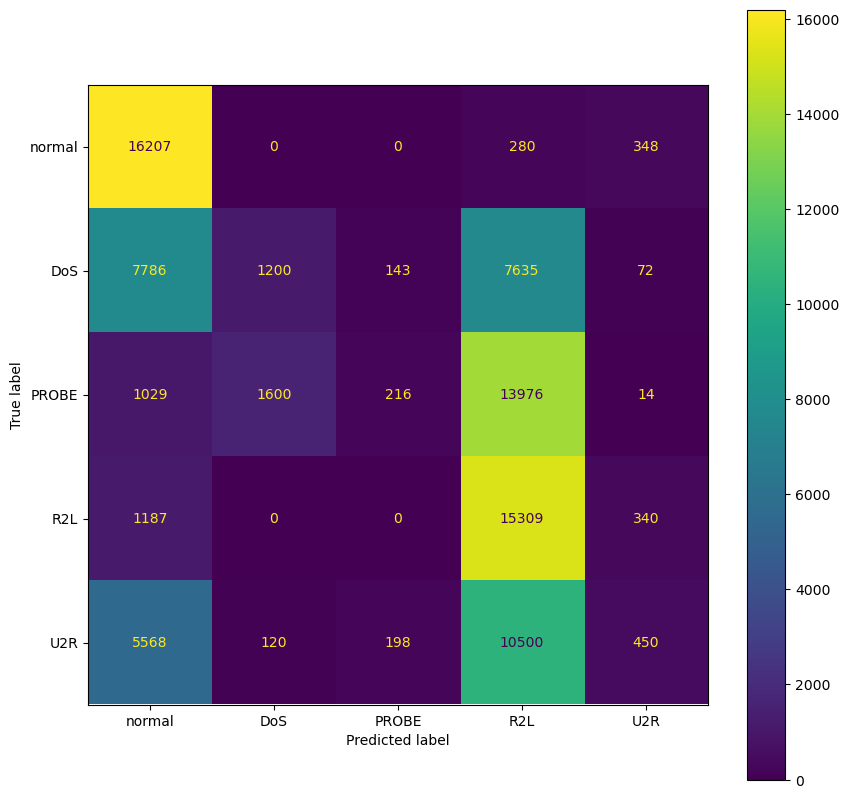

In [62]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_val)

print(evaluate_model(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))
plot_confusion_matrix(y_val, y_pred_nb, label)

[[16207     0     0   280   348]
 [ 7786  1200   143  7635    72]
 [ 1029  1600   216 13976    14]
 [ 1187     0     0 15309   340]
 [ 5568   120   198 10500   450]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']


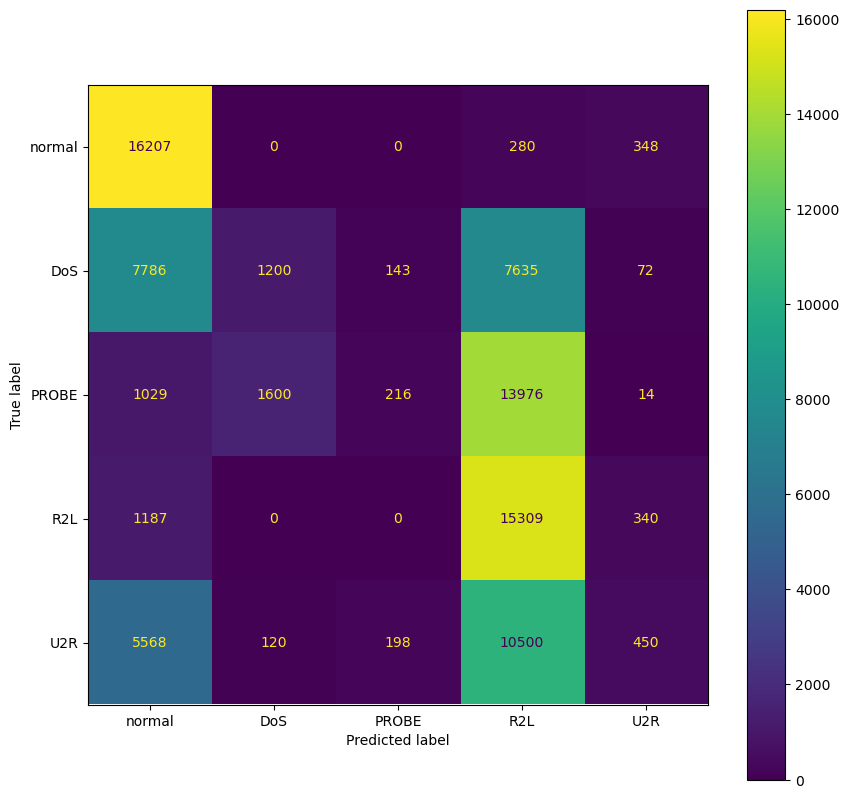

In [63]:
plot_confusion_matrix(y_val, y_pred_nb, label)

AUROC: 0.7437


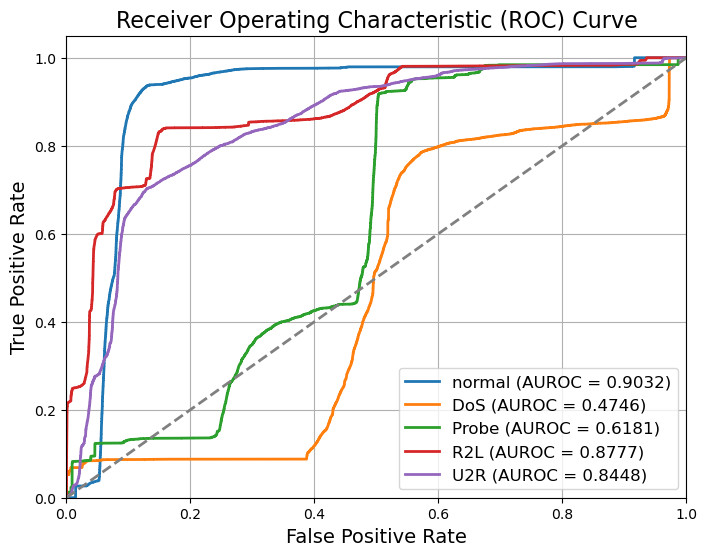

In [64]:
plot_auroc(naive_bayes_model, X_val, y_val) 

In [65]:
calculate_rates(y_val, y_pred_nb)

{'TPR': [0.9626967626967627,
  0.07127583749109052,
  0.01283041283041283,
  0.9093014967925873,
  0.026728439059158945],
 'FPR': [0.2312044310470279,
  0.025541266965638087,
  0.005063629478936192,
  0.48099254551394377,
  0.011493570134537138],
 'FNR': [0.037303237303237306,
  0.9287241625089094,
  0.9871695871695871,
  0.09069850320741268,
  0.9732715609408411],
 'TNR': [0.7687955689529721,
  0.9744587330343619,
  0.9949363705210638,
  0.5190074544860562,
  0.9885064298654629]}

In [67]:
mnb_ = pd.DataFrame({'actual':y_val, 'predicted_mnb': y_pred_nb})



# Map the numeric labels back to their original class names
mnb_['actual'], mnb_['predicted_mnb'] = mnb_['actual'].map(label_mapping), mnb_['predicted_mnb'].map(label_mapping)

# mnb_.to_csv("mnb_result.csv", index=False)
mnb_

,actual,predicted_mnb
0,normal,U2R
1,DOS,DOS
2,U2R,U2R
3,DOS,DOS
4,normal,DOS
...,...,...
84173,PROBE,U2R
84174,normal,U2R
84175,PROBE,U2R
84176,PROBE,DOS


### Decision Tree Classifier

{'accuracy_score': 0.9968043906959063, 'precision_score': 0.9968042489263487, 'recall_score': 0.9968044108742612, 'f1_score': 0.9968040212335264}
[[16789    21     0     2    23]
 [   13 16765     6     2    50]
 [    1     0 16802     5    27]
 [    0     0     2 16831     3]
 [   13    37    56     8 16722]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']


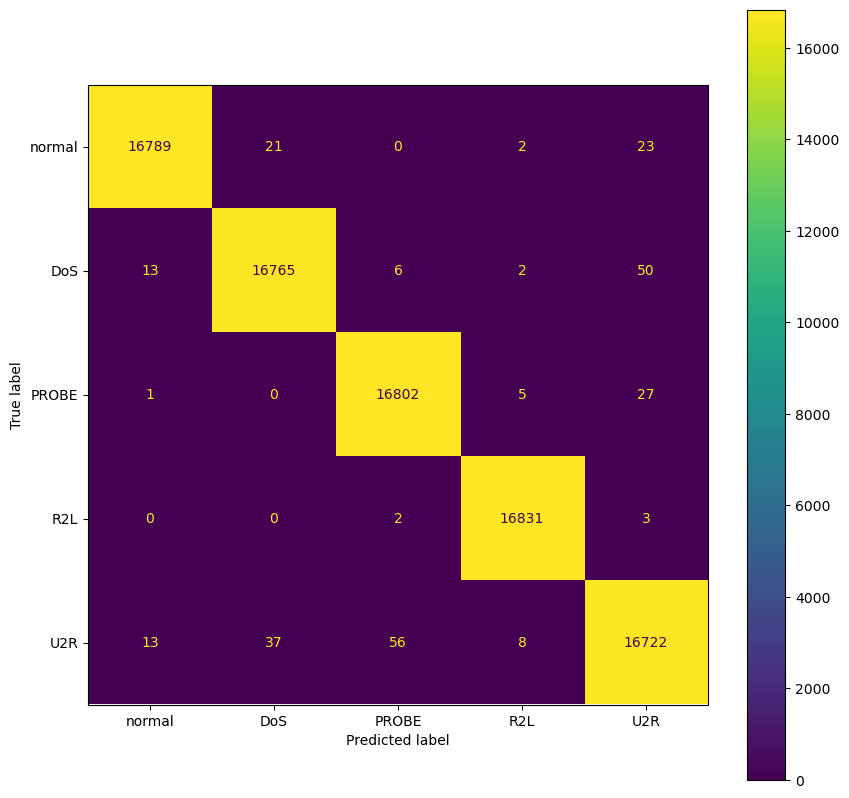

In [36]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy")
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

In [39]:
y_val

array([4, 0, 3, ..., 1, 1, 1])

AUROC: 0.9980


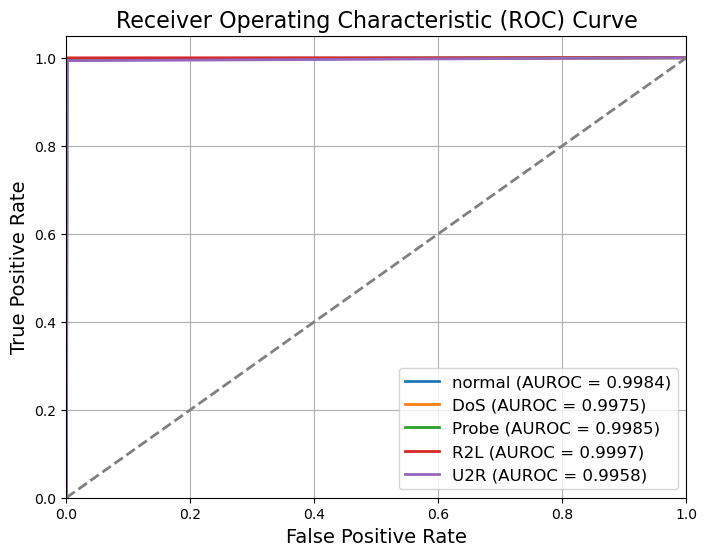

In [42]:
plot_auroc(decision_tree_model, X_val, y_val) 

In [71]:
calculate_rates(y_val, decision_tree_y_pred)

{'TPR': [0.9998217998217999,
  0.9991090520313614,
  0.9997623997623998,
  1.0,
  0.9975053456878118],
 'FPR': [0.00011879482648530656,
  0.0001930444596240088,
  0.0002672883595919398,
  0.00017819488580677736,
  0.0001930444596240088],
 'FNR': [0.0001782001782001782,
  0.0008909479686386316,
  0.0002376002376002376,
  0.0,
  0.0024946543121881683],
 'TNR': [0.9998812051735146,
  0.999806955540376,
  0.9997327116404081,
  0.9998218051141933,
  0.999806955540376]}

In [45]:
dtc_ = pd.DataFrame({'actual':y_val, 'predicted_dtc': decision_tree_y_pred})

# Map the numeric labels back to their original class names
dtc_['actual'], dtc_['predicted_dtc'] = dtc_['actual'].map(label_mapping), dtc_['predicted_dtc'].map(label_mapping)

# dtc_.to_csv("dtc_result.csv", index=False)
dtc_

,actual,predicted_dtc
0,normal,normal
1,DOS,DOS
2,U2R,U2R
3,DOS,DOS
4,normal,normal
...,...,...
84173,PROBE,PROBE
84174,normal,normal
84175,PROBE,PROBE
84176,PROBE,PROBE


### Logistic Regression

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy_score': 0.3794578155812683, 'precision_score': 0.26451187383913277, 'recall_score': 0.3794603654903013, 'f1_score': 0.25977510888120686}
[[16390    33     0     1   411]
 [ 9392  1425     7    26  5986]
 [  797  1934     0    91 14013]
 [  476  9550     0    65  6745]
 [ 2072   672     6    24 14062]] ['normal', 'DoS', 'PROBE', 'R2L', 'U2R']
              precision    recall  f1-score   support

           0       0.56      0.97      0.71     16835
           1       0.10      0.08      0.09     16836
           2       0.00      0.00      0.00     16835
           3       0.31      0.00      0.01     16836
           4       0.34      0.84      0.48     16836

    accuracy                           0.38     84178
   macro avg       0.26      0.38      0.26     84178
weighted avg       0.26      0.38      0.26     84178



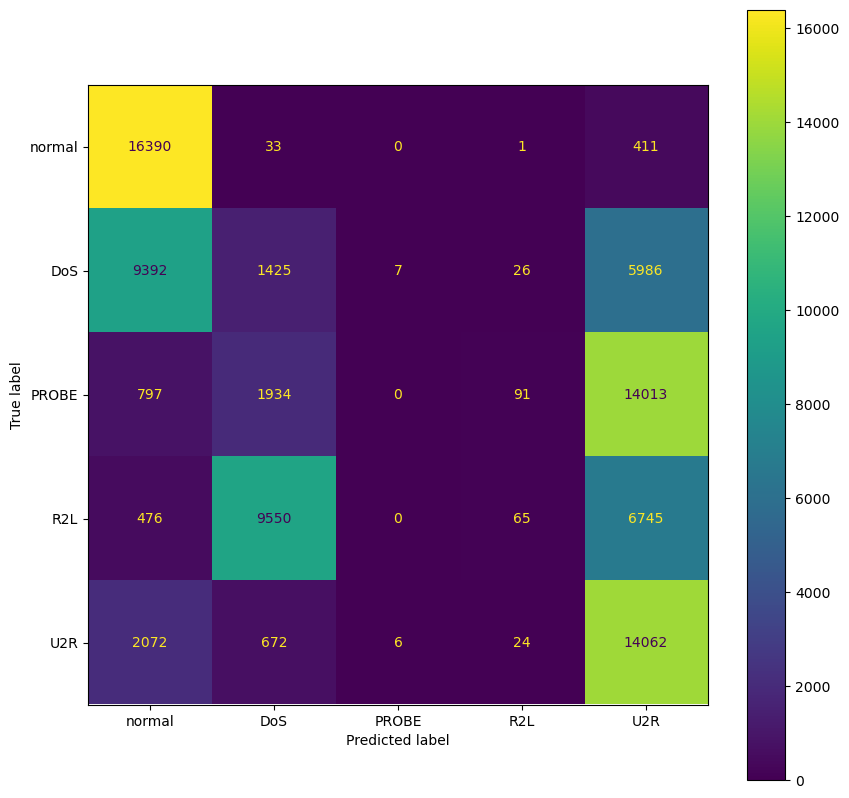

In [73]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000) # , solver='liblinear'
logistic_regression_model.fit(X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

AUROC: 0.7421


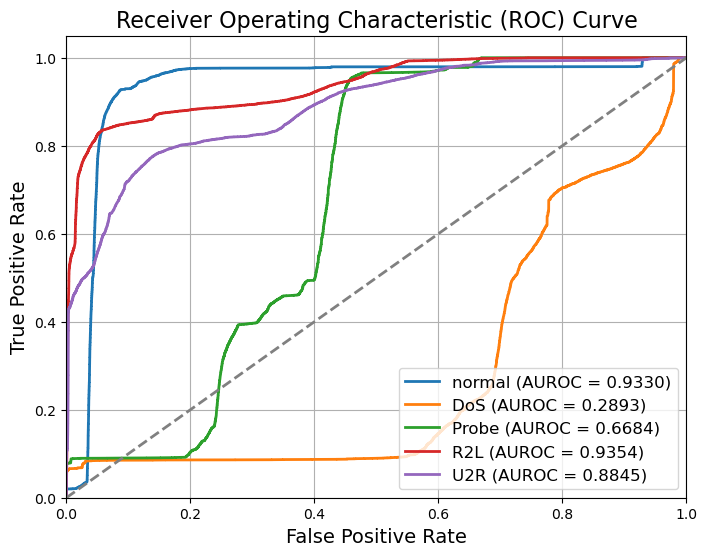

In [75]:
plot_auroc(logistic_regression_model, X_val, y_val) 

In [76]:
calculate_rates(y_val, logistic_regression_y_pred)

{'TPR': [0.9735669735669735,
  0.08464005702067,
  0.0,
  0.003860774530767403,
  0.8352340223330957],
 'FPR': [0.18913621311791873,
  0.18100145525823408,
  0.00019304159303862317,
  0.0021086394820468654,
  0.4032401770069199],
 'FNR': [0.026433026433026433,
  0.91535994297933,
  1.0,
  0.9961392254692326,
  0.16476597766690426],
 'TNR': [0.8108637868820813,
  0.8189985447417659,
  0.9998069584069613,
  0.9978913605179531,
  0.5967598229930801]}

In [79]:
lr_ = pd.DataFrame({'actual':y_val, 'predicted_lr': logistic_regression_y_pred})



# Map the numeric labels back to their original class names
lr_['actual'], lr_['predicted_lr'] = lr_['actual'].map(label_mapping), lr_['predicted_lr'].map(label_mapping)

# lr_.to_csv("lr_result.csv", index=False)
lr_

,actual,predicted_lr
0,normal,normal
1,DOS,DOS
2,U2R,normal
3,DOS,DOS
4,normal,normal
...,...,...
84173,PROBE,DOS
84174,normal,normal
84175,PROBE,normal
84176,PROBE,DOS


# Ensemble Learning

In [82]:
# List of estimators
estimators_2 = [
    ('knn', knn_model),
    ('RFC', random_forest_model),
    ('NBC', naive_bayes_model),
    ('DTC', decision_tree_model),
    ('LRC', logistic_regression_model)
]

# Define the ensemble model
ensemble_2 = VotingClassifier(estimators_2, voting='soft', weights=[0.35, 0.1, 0.1, 0.35, 0.1])

# Train the ensemble model
ensemble_2.fit(X_train, y_train)
y_pred_hybrid_2 = ensemble_2.predict(X_val)

# Evaluate model
print(evaluate_model(y_val, y_pred_hybrid_2))
print(classification_report(y_val, y_pred_hybrid_2))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy_score': 0.9993822613984652, 'precision_score': 0.9993826802063708, 'recall_score': 0.9993822683131308, 'f1_score': 0.9993821550948254}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16835
           1       1.00      1.00      1.00     16836
           2       1.00      1.00      1.00     16835
           3       1.00      1.00      1.00     16836
           4       1.00      1.00      1.00     16836

    accuracy                           1.00     84178
   macro avg       1.00      1.00      1.00     84178
weighted avg       1.00      1.00      1.00     84178



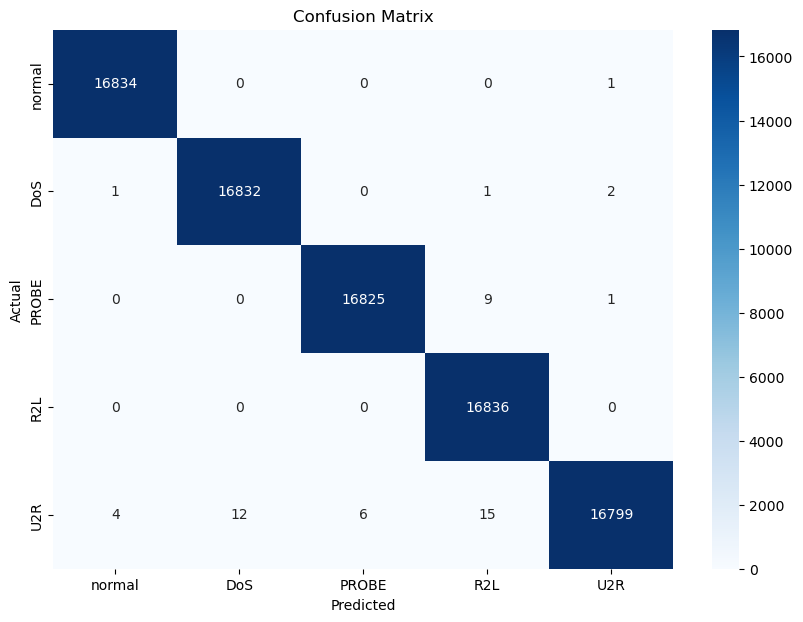

In [106]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
label = ['normal', 'DoS',  'PROBE', 'R2L', 'U2R']
plot_confusion_matrix(y_val, y_pred_hybrid_2, label)

AUROC: 1.0000


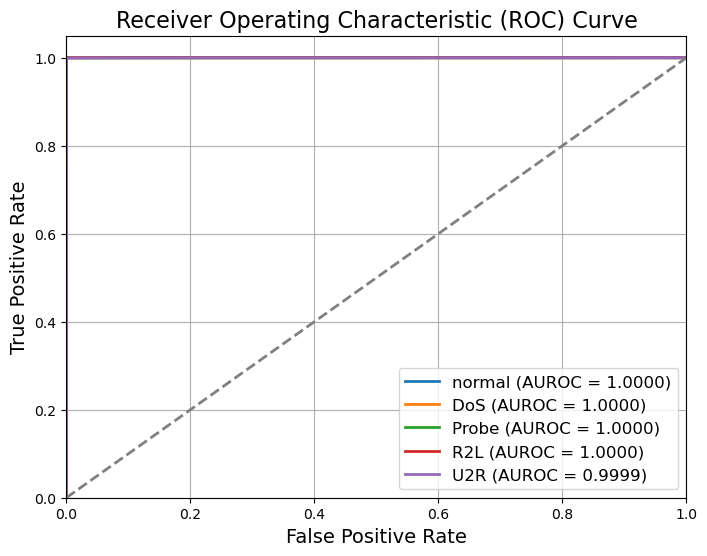

In [91]:
plot_auroc(ensemble_2, X_val, y_val)

In [93]:
calculate_rates(y_val, y_pred_hybrid_2)

{'TPR': [0.9999405999405999,
  0.9997624138750297,
  0.9994059994059994,
  1.0,
  0.9978023283440247],
 'FPR': [7.42467665533166e-05,
  0.00017819488580677736,
  8.909611986397992e-05,
  0.0003712393454307861,
  5.939829526892578e-05],
 'FNR': [5.94000594000594e-05,
  0.00023758612497030174,
  0.000594000594000594,
  0.0,
  0.002197671655975291],
 'TNR': [0.9999257532334467,
  0.9998218051141933,
  0.999910903880136,
  0.9996287606545692,
  0.9999406017047311]}

In [96]:
er_ = pd.DataFrame({'actual':y_val, 'predicted_er': y_pred_hybrid_2})



# Map the numeric labels back to their original class names
er_['actual'], er_['predicted_er'] = er_['actual'].map(label_mapping), er_['predicted_er'].map(label_mapping)

# er_.to_csv("ensemble_result.csv", index=False)
er_

,actual,predicted_er
0,normal,normal
1,DOS,DOS
2,U2R,U2R
3,DOS,DOS
4,normal,normal
...,...,...
84173,PROBE,PROBE
84174,normal,normal
84175,PROBE,PROBE
84176,PROBE,PROBE


In [72]:
err= pd.read_csv("ensemble_result.csv")

In [79]:
sss = X_val.iloc[ :, :-1]

In [68]:
err.columns

Index(['actual', 'predicted_er'], dtype='object')

In [89]:
X_val['Predicted_Class'] = err['predicted_er'].values
X_val

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,class,Predicted_Class
5188,-1.433406,0.596405,-0.444672,-1.149961,2.509284,1.120042,-1.561061,0.849499,0.064919,-0.364437,0.981542,-0.097037,0.566431,-1.091055,-0.308017,-1.884101,-0.101059,-0.211317,0.521873,-1.120217,0.028723,-0.141765,-0.238054,-0.040966,-0.246010,0.274055,-0.025238,-0.310383,-0.504400,0.464046,0.248291,0.274289,0.168795,0.196434,0.180756,0.124714,-0.031279,0.276966,-0.219582,0.164281,0.271315,0.298299,-0.215645,0.161457,-0.119319,0.092712,0.019399,0.015450,0.013883,-0.019287,-0.093786,0.033215,0.048525,-0.090902,-0.058824,-0.105565,-0.207413,-0.008289,-0.191566,-0.038521,-0.021040,-0.056979,-0.066736,0.026465,-0.039839,0.131631,-0.431000,-0.090887,0.145141,-0.045341,-0.020459,-0.055858,-0.005469,0.232443,-0.010078,0.022562,-0.323872,-0.234424,1.015800,0.187921,0.042053,-0.243011,-0.067449,0.331163,-0.510752,0.212990,-0.043615,1.335620,normal,normal
110012,1.208092,0.588724,0.065598,-2.682240,3.190255,1.539098,-2.003435,1.376987,0.270990,-1.390764,0.896866,-0.734864,0.056956,0.346718,0.048024,0.775836,0.451745,-0.621109,-0.144187,-0.134098,0.058582,0.014130,0.108368,-0.066356,0.006556,0.029092,0.014160,-0.038423,-0.033627,0.093504,-0.020295,0.013292,-0.036071,-0.024179,-0.016271,-0.017140,0.014987,0.003005,0.017857,0.001184,0.010870,0.000783,0.083221,-0.009750,-0.011981,0.015618,0.004404,0.007410,0.002983,-0.001798,0.006215,0.014866,-0.011857,-0.019665,-0.015728,-0.013194,0.002367,-0.014178,0.000238,-0.006705,-0.002022,-0.000904,0.010973,0.003148,0.039914,0.005963,0.046630,0.017481,-0.042664,0.025823,-0.001136,0.009557,-0.006741,-0.057490,0.000146,0.004887,0.102742,0.022052,-0.254327,-0.107980,-0.052085,-0.645095,0.110284,0.252581,-0.596006,0.269111,0.228987,1.851491,DOS,DOS
289664,4.764090,-4.179559,-0.410201,0.516971,0.221604,0.315511,-0.404743,0.237800,0.554750,-0.449882,-0.406824,-0.660585,0.008154,0.413063,0.305829,0.972755,0.277142,-0.234848,-0.170092,-0.076541,0.101050,-0.003009,-0.044737,-0.088568,-0.103637,0.024803,-0.006980,-0.036871,-0.076259,0.071422,0.110993,0.108795,-0.020331,0.052084,0.029410,-0.009398,0.009499,0.022714,-0.038707,-0.012959,-0.051897,0.014324,0.176439,0.007044,-0.010059,-0.001705,-0.001195,0.006924,-0.008223,-0.000558,-0.012727,-0.004210,0.021861,-0.005650,0.002936,0.046428,0.049624,-0.016549,0.013147,-0.004641,-0.013169,-0.034362,0.027717,0.037506,0.086355,-0.020876,0.115364,0.046035,-0.084433,0.030532,0.000800,0.000616,-0.005706,-0.116143,-0.002227,0.019730,0.178398,0.029836,-0.514070,-0.152086,-0.057936,-0.816436,0.267012,0.230452,-1.014764,0.258604,0.561143,-0.098362,U2R,U2R
11733,-3.805540,0.220176,-6.161949,0.148521,-1.610787,0.749816,-0.132293,-0.600425,0.506227,-1.297155,0.044736,0.301274,-0.068844,-0.018509,-0.049198,-0.147825,-0.218193,-0.020330,0.109183,0.029106,0.036225,0.056989,0.027328,-0.084356,-0.035957,0.087156,0.024951,-0.019983,-0.072745,0.032027,0.064439,0.056664,-0.031523,0.056972,0.015423,0.008694,0.021030,0.046384,-0.006646,0.026593,0.072205,0.069764,0.052549,-0.019691,0.025628,0.005628,-0.004731,0.003232,0.005010,-0.001826,-0.003910,0.025313,-0.013659,-0.017840,0.004542,-0.009276,-0.009507,-0.019310,-0.028584,-0.016582,0.002502,0.014562,0.004828,0.017342,0.070286,0.009329,-0.018180,0.005931,0.017778,0.007867,-0.017909,-0.000639,0.016878,0.001580,0.000748,-0.019056,-0.024312,0.004828,-0.014469,-0.034698,-0.006795,-0.049424,-0.018539,0.010824,-0.131108,0.027481,-0.033398,-0.128421,DOS,DOS
112761,4.891938,-4.207856,-0.465648,0.473168,0.239561,0.282929,-0.353322,0.186150,0.370871,-0.414122,-0.393893,-0.657592,0.039806,0.403971,0.2998

In [90]:
X_val.isnull().sum()

PC1                0
PC2                0
PC3                0
PC4                0
PC5                0
                  ..
PC86               0
PC87               0
PC88               0
class              0
Predicted_Class    0
Length: 90, dtype: int64

In [96]:
# X_val.to_csv("Final_result_es.csv", index = True)

In [100]:
X_val.shape[0]

84178

In [107]:
misclassified = X_val[X_val['class'] != X_val['Predicted_Class']]
# misclassified.to_csv("misclassified_es.csv")
misclassified

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,class,Predicted_Class
27785,-2.176602,0.340146,2.154295,2.716288,1.333909,1.531657,-1.063496,-1.612000,-0.736170,-0.100200,-0.767654,0.411396,-0.045782,0.120237,0.190879,0.101422,-0.176218,0.407651,-0.123346,-0.318888,0.118392,-0.395410,-0.669606,0.199989,-0.537087,-0.543818,-0.358958,0.232357,0.250844,-0.373676,0.142100,0.440309,0.232306,0.547809,0.115850,0.245345,-0.346326,0.491436,-0.202250,0.116308,-0.142171,0.036361,-0.002066,0.139841,-0.019158,-0.107009,-0.017250,0.013716,-0.010175,-0.000079,-0.125636,0.024208,0.012242,0.087087,0.014308,0.177866,-0.098160,-0.036125,-0.008864,0.013615,-0.045897,-0.010212,-0.017539,0.025592,0.100772,0.004292,-0.012089,0.057694,-0.052625,0.027280,0.031620,-0.016902,-0.009349,0.004601,0.018447,0.047391,0.131072,-0.043077,-0.274286,-0.030128,0.062254,0.448112,0.014430,-0.157448,0.289589,-0.109131,-0.112964,-0.149430,normal,U2R
77096,1.638127,0.463811,-0.354598,-4.459823,4.916627,2.264420,-2.554455,1.078721,1.022278,-1.601665,0.664057,-3.101967,-0.379700,2.069013,0.947830,6.029215,3.537595,-3.987274,-2.273177,0.158914,0.354743,-0.486459,0.548195,-1.667303,-0.403154,0.817612,-0.433506,-0.505020,-1.556179,2.758789,1.242544,1.015113,-1.111627,-0.463373,0.054618,0.337050,0.804669,0.577770,-0.272008,-0.578484,2.175282,0.481965,-0.850551,-0.749642,-0.433655,0.766331,0.068041,-0.021918,0.124038,-0.089104,-0.000767,0.433287,0.581718,0.145185,1.302423,-0.774305,-1.677502,-0.177992,-0.743492,-0.195394,0.781020,0.878877,-0.182012,-0.246909,-0.789924,0.114080,-1.651219,-0.233512,1.257805,-0.368627,-0.001099,0.030990,0.159536,1.777754,0.089849,-0.453090,-2.706826,0.007575,4.810424,1.732208,0.406875,5.892797,-1.468391,-1.592243,2.628475,-1.060643,-0.777627,-4.407164,normal,R2L
111248,4.927342,3.622376,-0.634482,-0.519139,-1.557347,-1.423112,1.549533,-0.289955,-1.104213,0.615719,1.295456,3.288967,-0.863319,0.175222,0.596372,1.148244,0.140647,-1.124637,-0.586951,0.741788,-1.131955,-0.820947,-2.198843,1.956799,-0.363395,0.422216,1.741814,-0.279667,0.092756,-0.817308,-0.582284,-2.696294,1.220407,-2.802716,3.507898,0.293266,-0.623361,0.303718,-0.129459,-0.822234,-6.251101,9.118171,0.017024,-2.195252,-3.314194,-5.862009,1.006170,0.034888,0.075328,0.157105,-0.252391,2.504697,-2.725066,2.154860,0.003834,-2.098401,-4.080547,4.032051,-1.027289,-2.435549,-0.566621,-0.560890,-1.438064,1.637229,-0.321311,-0.599731,1.021982,0.174058,-0.014270,0.634604,0.273802,0.744756,0.034422,0.754027,0.012426,-0.007936,-0.120081,0.876843,0.598302,0.307746,0.118571,1.903448,-0.099460,0.198819,1.496094,-0.116474,-0.578242,1.750175,normal,U2R
101041,6.336777,5.055000,-0.882047,-0.222839,-0.196774,-0.225741,0.137488,0.251652,-2.627573,-0.131722,0.158635,-0.576579,-0.483660,0.704799,0.250927,1.266517,0.077924,0.082686,-0.229753,0.293182,-0.129070,0.180333,0.102932,-0.269722,-0.001528,0.107625,-0.067548,-0.059931,0.029133,-0.092889,0.001247,-0.078310,-0.208342,-0.130947,-0.019964,0.093784,0.001543,-0.047907,0.037977,-0.087521,-0.042289,-0.133320,0.154132,-0.049268,-0.036330,-0.025302,0.003898,0.001971,-0.015462,0.000387,0.021542,0.031760,-0.073859,0.008177,0.038853,0.083492,0.089613,-0.018218,0.044948,0.013704,-0.027419,0.031104,0.046203,0.001963,0.105911,-0.066982,0.220634,0.047028,-0.090525,0.014957,-0.030846,0.009760,0.025716,-0.183099,-0.001516,-0.053242,0.162663,0.085585,-0.809749,-0.164497,0.006371,-0.235295,0.197237,0.028567,-0.375147,0.035675,0.416994,-0.179698,normal,DOS
99983,5.421828,4.321814,-0.209827,-0.139505,-0.516549,-0.369773,0.528500,-0.559724,-0.852879,-0.613031,0.204348,-0.134293,-0.300191,0.79258

In [108]:
count =0
for u in range(X_val.shape[0]):
    if X_val['class'].values[u] != X_val['Predicted_Class'].values[u]:
        count += 1
        print(u, X_val['class'].values[u], X_val['Predicted_Class'].values[u])
print(count)

65 normal U2R
164 normal R2L
288 normal U2R
2766 normal DOS
3201 normal U2R
3528 normal PROBE
3773 normal DOS
3801 R2L U2R
4130 normal DOS
5562 R2L U2R
5969 R2L U2R
11524 normal PROBE
16348 normal U2R
18834 normal PROBE
19539 normal U2R
19857 normal DOS
21229 normal PROBE
28158 PROBE normal
28953 normal PROBE
30941 PROBE normal
31937 normal U2R
33571 normal U2R
33611 normal U2R
33689 DOS normal
34513 normal PROBE
37982 normal R2L
39652 R2L U2R
40201 R2L U2R
42302 normal U2R
46725 R2L normal
47650 normal PROBE
48722 normal U2R
49766 normal PROBE
51596 R2L U2R
53164 normal PROBE
53332 normal R2L
53752 normal U2R
56076 normal R2L
57632 R2L U2R
59253 normal U2R
60234 normal PROBE
61870 R2L U2R
63992 PROBE U2R
74069 normal U2R
75792 PROBE DOS
76848 normal U2R
77835 normal R2L
78352 R2L U2R
78453 normal PROBE
79192 normal R2L
80841 normal U2R
81694 normal PROBE
52
